In [39]:
from utils import *
import os
import numpy as np
from griffin_lim import *
import matplotlib.pyplot as plt
import soundfile as sf
from tqdm import tqdm

## Audio MNIST

### Load Random Spectrogram created from the iDLG model

In [ ]:
folder_path = "results_mat/iDLG_audio_mnist"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

spec_db = np.load(f'{folder_path}/{sample_file[0]}')

sr = 8000
img = librosa.display.specshow(spec_db[0][0], x_axis='time', y_axis='linear', fmax=sr//2, fmin=0, cmap='magma')

### Reconstrunct signal in time-domain

In [ ]:
inverse_spec = np.array(10**(spec_db[0][0]/20))

win_size = 256
hop = 128
win = 'hamming'


y_reconstructed = mfgla(inverse_spec, iterations=1000, stft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None }
                        , istft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None })

In [ ]:
folder_path = "data/audioMNIST/data"
y, sr = librosa.load(folder_path + "/" + sample_file[0].replace("npy","wav"), sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(y_reconstructed, sr=sr, ax=ax[0])
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[0].set(title='Reconstruction', xlabel=None)
ax[0].label_outer()
ax[1].set(title='Original', xlabel=None)
ax[1].label_outer()

In [ ]:
import soundfile as sf
sf.write('results_audio/audio_mnist/' + sample_file[0].replace("npy","wav"), y_reconstructed, sr) # Save as WAV file

In [15]:
# For all files

folder_path = "results_mat/iDLG_audio_mnist"

all_files = os.listdir(folder_path)


win_size = 512
hop = 256
win = 'hamming'
sr = 48000
i = 0
for file in all_files:
    spec_db = np.load(f'{folder_path}/{file}')
    inverse_spec = np.array(10**(spec_db[0][0]/20))
    try:
        y_reconstructed = mfgla(inverse_spec, iterations=1000, stft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None }
                            , istft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None })
    except Exception as e:
        print(f"Error processing {file}")
        continue
    sf.write('results_audio/audio_mnist/' + file.replace("npy","wav"), y_reconstructed, sr)
    i += 1
    if i % 100 == 0:
        print(f"Processed {i}/{len(all_files)} files")

C:\Users\Andreas\AppData\Local\Temp\ipykernel_21488\2199060064.py:15: RuntimeWarning: overflow encountered in power
  inverse_spec = np.array(10**(spec_db[0][0]/20))


Error processing 0_07_30.npy
Error processing 0_09_13.npy
Error processing 0_15_27.npy
Error processing 0_18_22.npy
Error processing 0_20_40.npy
Error processing 0_20_7.npy
Error processing 0_21_3.npy
Error processing 0_22_39.npy
Error processing 0_23_5.npy
Error processing 0_26_8.npy
Error processing 0_31_6.npy
Error processing 0_36_15.npy
Error processing 0_48_41.npy
Error processing 0_49_12.npy
Error processing 0_50_19.npy
Error processing 0_51_23.npy
Error processing 0_51_25.npy
Error processing 1_05_9.npy
Error processing 1_12_31.npy
Error processing 1_14_7.npy
Error processing 1_15_48.npy
Processed 100/983 files
Error processing 1_17_34.npy
Error processing 1_17_41.npy
Error processing 1_18_19.npy
Error processing 1_20_1.npy
Error processing 1_20_44.npy
Error processing 1_20_5.npy
Error processing 1_38_21.npy
Error processing 1_42_27.npy
Error processing 1_45_36.npy
Error processing 1_50_5.npy
Error processing 1_52_44.npy
Error processing 1_54_12.npy
Error processing 1_55_16.npy


## Urbansound

### Load Random Spectrogram created from the iDLG model

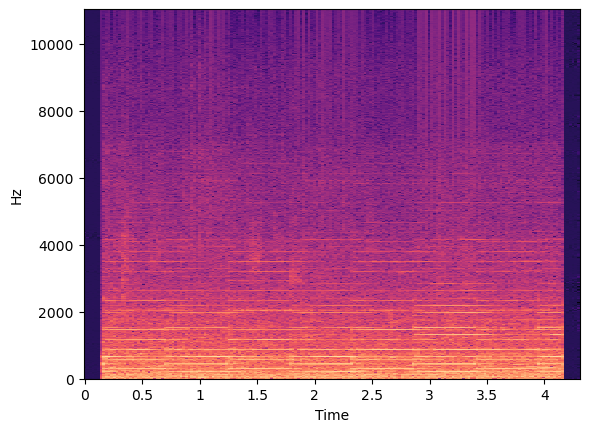

In [16]:
folder_path = "results_mat/iDLG_urbansound"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

spec_db = np.load(f'{folder_path}/{sample_file[0]}')
sr = 44100
img = librosa.display.specshow(spec_db[0][0], x_axis='time', y_axis='linear', fmax=sr//2, fmin=0, cmap='magma')

In [17]:
spec_db.shape

(1, 1, 1025, 186)

### Reconstrunct signal in time-domain

In [23]:
folder_path = "data/mnist"
fold_dict = {}

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".wav"):
            fold = os.path.basename(root)
            fold_dict[file] = fold

print(fold_dict)

{'0_01_0.wav': '01', '0_01_1.wav': '01', '0_01_10.wav': '01', '0_01_11.wav': '01', '0_01_12.wav': '01', '0_01_13.wav': '01', '0_01_14.wav': '01', '0_01_15.wav': '01', '0_01_16.wav': '01', '0_01_17.wav': '01', '0_01_18.wav': '01', '0_01_19.wav': '01', '0_01_2.wav': '01', '0_01_20.wav': '01', '0_01_21.wav': '01', '0_01_22.wav': '01', '0_01_23.wav': '01', '0_01_24.wav': '01', '0_01_25.wav': '01', '0_01_26.wav': '01', '0_01_27.wav': '01', '0_01_28.wav': '01', '0_01_29.wav': '01', '0_01_3.wav': '01', '0_01_30.wav': '01', '0_01_31.wav': '01', '0_01_32.wav': '01', '0_01_33.wav': '01', '0_01_34.wav': '01', '0_01_35.wav': '01', '0_01_36.wav': '01', '0_01_37.wav': '01', '0_01_38.wav': '01', '0_01_39.wav': '01', '0_01_4.wav': '01', '0_01_40.wav': '01', '0_01_41.wav': '01', '0_01_42.wav': '01', '0_01_43.wav': '01', '0_01_44.wav': '01', '0_01_45.wav': '01', '0_01_46.wav': '01', '0_01_47.wav': '01', '0_01_48.wav': '01', '0_01_49.wav': '01', '0_01_5.wav': '01', '0_01_6.wav': '01', '0_01_7.wav': '01',

In [20]:
folder_path = "results_mat/iDLG_audio_mnist512"

all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

spec_db = np.load(f'{folder_path}/{sample_file[0]}')
sr = 48000





inverse_spec = np.array(10**(spec_db[0][0]/20))

win_size = 512
hop = 256
win = 'hamming'

y_reconstructed = mfgla(inverse_spec, iterations=2000, stft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : False }
                        , istft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : False })

In [17]:
file_name = sample_file[0].replace("npy","wav")

y_org, _ = librosa.load(f'data/mnist/{fold_dict[file_name]}/{file_name}', sr=sr)
y_org_padded = pad_segment(y_org, 47998)

In [18]:
print(len(y_reconstructed), len(y_org_padded))

47360 47998


In [ ]:
# audio mnist signal reconstrunction using griffin lim

win_sizes = [512, 1024, 2048]
sr = 48000
for win_size in win_sizes:
        
    folder_path = f"results_mat/iDLG_audio_mnist{str(win_size)}"
    all_files = os.listdir(folder_path)

    hop = win_size // 2
    win = 'hamming'
    i = 0
    for file in all_files:
        spec_db = np.load(f'{folder_path}/{file}')
        inverse_spec = np.array(10**(spec_db[0][0]/20))
        try:
            y_reconstructed = mfgla(inverse_spec, iterations=1000, stft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None }
                                , istft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None })
        except Exception as e:
            print(f"Error processing {file} - {e}")
            continue
        sf.write(f'results_audio/audio_mnist{str(win_size)}/' + file.replace("npy","wav"), y_reconstructed, sr)
        
        print(f"Processed {i}/{len(all_files)} files")
        i += 1

In [40]:
folder_path = "data/audio"
fold_dict = {}

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".wav"):
            fold = os.path.basename(root)
            fold_dict[file] = fold

print(fold_dict)

{'101415-3-0-2.wav': 'fold1', '101415-3-0-3.wav': 'fold1', '101415-3-0-8.wav': 'fold1', '102106-3-0-0.wav': 'fold1', '102305-6-0-0.wav': 'fold1', '102842-3-0-1.wav': 'fold1', '102842-3-1-0.wav': 'fold1', '102842-3-1-5.wav': 'fold1', '102842-3-1-6.wav': 'fold1', '103074-7-0-0.wav': 'fold1', '103074-7-0-1.wav': 'fold1', '103074-7-0-2.wav': 'fold1', '103074-7-1-0.wav': 'fold1', '103074-7-1-1.wav': 'fold1', '103074-7-1-2.wav': 'fold1', '103074-7-1-3.wav': 'fold1', '103074-7-1-4.wav': 'fold1', '103074-7-1-5.wav': 'fold1', '103074-7-1-6.wav': 'fold1', '103074-7-2-0.wav': 'fold1', '103074-7-3-0.wav': 'fold1', '103074-7-3-1.wav': 'fold1', '103074-7-3-2.wav': 'fold1', '103074-7-3-3.wav': 'fold1', '103074-7-4-0.wav': 'fold1', '103074-7-4-1.wav': 'fold1', '103074-7-4-2.wav': 'fold1', '103074-7-4-3.wav': 'fold1', '103074-7-4-4.wav': 'fold1', '103074-7-4-5.wav': 'fold1', '103074-7-4-6.wav': 'fold1', '103258-5-0-0.wav': 'fold1', '103258-5-0-1.wav': 'fold1', '103258-5-0-10.wav': 'fold1', '103258-5-0-

In [43]:
audio_data = load_data("data/audio")
audio_data = [data for data in audio_data if len(data[0]) in [176400, 192000]]

In [47]:
sample_rate_dict = {file_name: sample_rate for _, sample_rate, file_name in audio_data}
print(sample_rate_dict)

{'101415-3-0-2.wav': 48000, '101415-3-0-3.wav': 48000, '101415-3-0-8.wav': 48000, '102842-3-0-1.wav': 44100, '102842-3-1-0.wav': 44100, '102842-3-1-5.wav': 44100, '102842-3-1-6.wav': 44100, '103074-7-0-0.wav': 48000, '103074-7-0-1.wav': 48000, '103074-7-0-2.wav': 48000, '103074-7-1-0.wav': 48000, '103074-7-1-1.wav': 48000, '103074-7-1-2.wav': 48000, '103074-7-1-3.wav': 48000, '103074-7-1-4.wav': 48000, '103074-7-1-5.wav': 48000, '103074-7-1-6.wav': 48000, '103074-7-3-0.wav': 48000, '103074-7-3-1.wav': 48000, '103074-7-3-2.wav': 48000, '103074-7-3-3.wav': 48000, '103074-7-4-0.wav': 48000, '103074-7-4-1.wav': 48000, '103074-7-4-2.wav': 48000, '103074-7-4-3.wav': 48000, '103074-7-4-4.wav': 48000, '103074-7-4-5.wav': 48000, '103074-7-4-6.wav': 48000, '103258-5-0-0.wav': 48000, '103258-5-0-1.wav': 48000, '103258-5-0-10.wav': 48000, '103258-5-0-11.wav': 48000, '103258-5-0-12.wav': 48000, '103258-5-0-13.wav': 48000, '103258-5-0-14.wav': 48000, '103258-5-0-15.wav': 48000, '103258-5-0-16.wav': 

In [49]:
# urbansound signal reconstrunction using griffin lim

win_sizes = [1024, 2048]
for win_size in win_sizes:
        
    folder_path = f"results_mat/iDLG_urbansound{str(win_size)}"
    all_files = os.listdir(folder_path)

    hop = win_size // 2
    win = 'hamming'
    i = 0
    for file in all_files:
        spec_db = np.load(f'{folder_path}/{file}')
        inverse_spec = np.array(10**(spec_db[0][0]/20))
        try:
            y_reconstructed = mfgla(inverse_spec, iterations=1000, stft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None }
                                , istft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None })
        except Exception as e:
            print(f"Error processing {file} - {e}")
            continue
        sr = sample_rate_dict[file.replace("npy","wav")]
        sf.write(f'results_audio/urbansound{str(win_size)}/' + file.replace("npy","wav"), y_reconstructed, sr)
        
        print(f"Processed {i}/{len(all_files)} files")
        i += 1

Processed 0/927 files
Processed 1/927 files
Error processing 100795-3-0-0.npy - Audio buffer is not finite everywhere
Error processing 100795-3-1-0.npy - Audio buffer is not finite everywhere


C:\Users\Andreas\AppData\Local\Temp\ipykernel_27816\3225765099.py:14: RuntimeWarning: overflow encountered in power
  inverse_spec = np.array(10**(spec_db[0][0]/20))


Processed 2/927 files
Processed 3/927 files
Processed 4/927 files
Processed 5/927 files
Processed 6/927 files
Processed 7/927 files
Processed 8/927 files
Error processing 101729-0-0-21.npy - Audio buffer is not finite everywhere


c:\Users\Andreas\OneDrive\Desktop\Bachelor\BachelorThesis\griffin_lim.py:33: RuntimeWarning: invalid value encountered in add
  _M = spectrogram + (alpha * np.abs(_D))


Processed 9/927 files
Processed 10/927 files


KeyboardInterrupt: 

In [ ]:
folder_path = "data/audio/"
for dir, _ , files in os.walk(folder_path):
    if sample_file[0].replace("npy","wav") in files:
        folder_path = dir
        break
y, sr = librosa.load(folder_path + "/" + sample_file[0].replace("npy","wav"), sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(y_reconstructed, sr=sr, ax=ax[0])
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[0].set(title='Reconstruction', xlabel=None)
ax[0].label_outer()
ax[1].set(title='Original', xlabel=None)
ax[1].label_outer()

In [ ]:
import soundfile as sf
sf.write('results_audio/urbansound/' + sample_file[0].replace("npy","wav"), y_reconstructed, sr) # Save the reconstructed audio

In [ ]:
# For all files

folder_path = "results_mat/iDLG_urbansound"

all_files = os.listdir(folder_path)


win_size = 2048
hop = 1024
win = 'hamming'
i = 0
for file in all_files:
    spec_db = np.load(f'{folder_path}/{file}')
    inverse_spec = np.array(10**(spec_db[0][0]/20))
    try:
        y_reconstructed = mfgla(inverse_spec, iterations=1000, stft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None }
                            , istft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None })
        folder_path2 = "data/audio/"
        for dir, _ , files in os.walk(folder_path2):
            if file.replace("npy","wav") in files:
                folder_path2 = dir
                break
        _, sr = librosa.load(folder_path2 + "/" + file.replace("npy","wav"), sr=None)
    except Exception as e:
        print(f"Error processing {file} - {e}")
        continue
    sf.write('results_audio/urbansound/' + file.replace("npy","wav"), y_reconstructed, sr)
    i += 1
    if i % 100 == 0:
        print(f"Processed {i}/{len(all_files)} files")

In [32]:
f"results_mat/iDLG_audio_mnist{str(win_size)}"

'results_mat/iDLG_audio_mnist512'